In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams

In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/MyDrive/train.csv')
Test=pd.read_csv('gdrive/MyDrive/test.csv')

df.head()

Mounted at /content/gdrive


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_id = Test["PassengerId"]

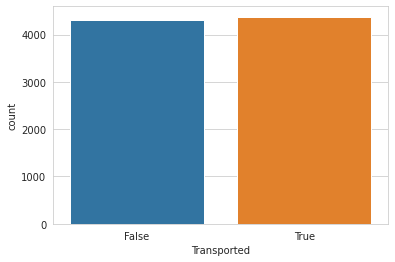

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',data=df)

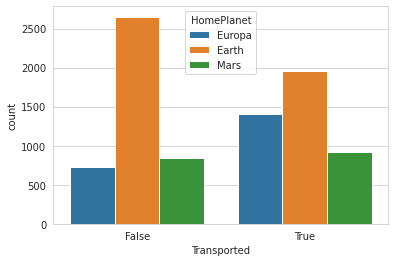

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=df)
rcParams['figure.figsize'] = 15,8


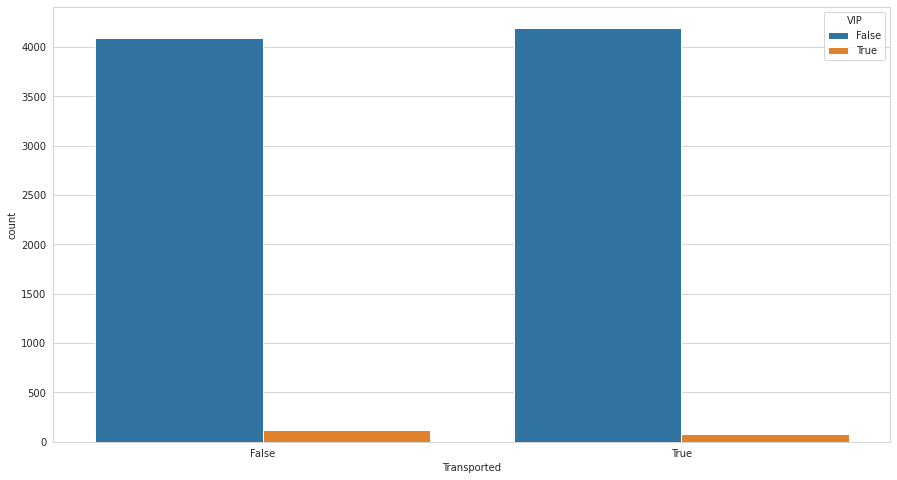

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='VIP', data=df)

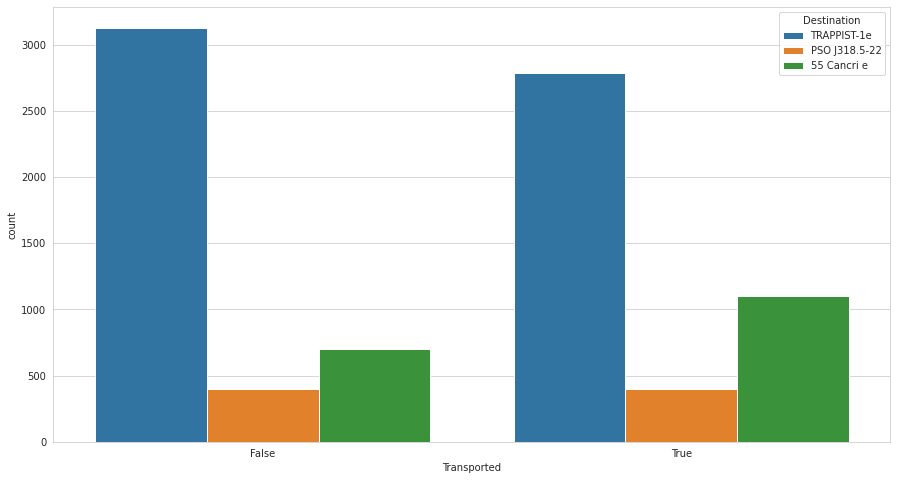

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='Destination', data=df)

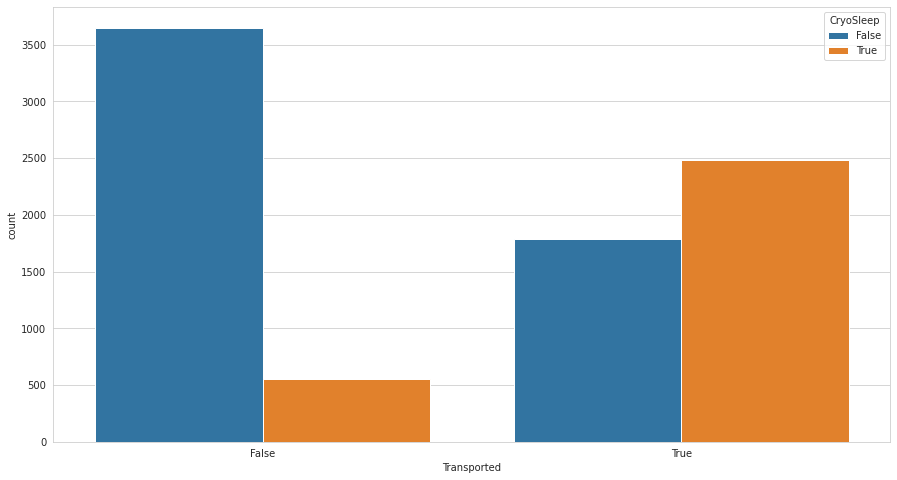

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='CryoSleep', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


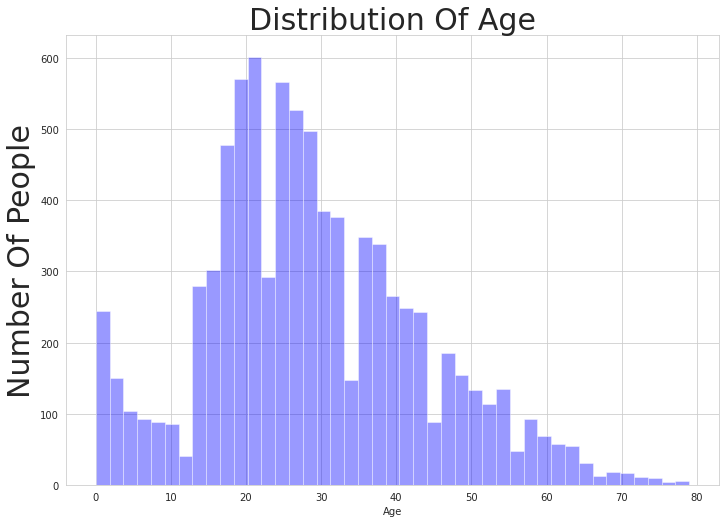

In [ ]:
rcParams['figure.figsize'] = 11.7,8.27
sns.distplot( x=df["Age"], hist=True, kde=False, rug=False ,color="blue")
sns.set(font_scale = 2)
plt.title('Distribution Of Age',fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Number Of People',fontsize = 30)
plt.show()

In [ ]:
cols=['Age', 'RoomService', 'FoodCourt']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  Test[col]=pd.to_numeric(df[col], errors='coerce')

df['Transported'] =df['Transported'].map({True: 'True', False: 'False'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

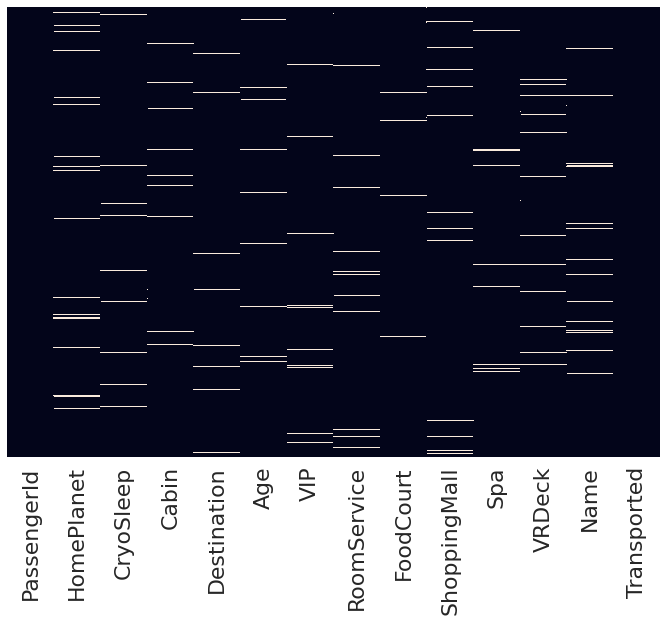

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
Test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              92
VIP              93
RoomService     100
FoodCourt        92
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

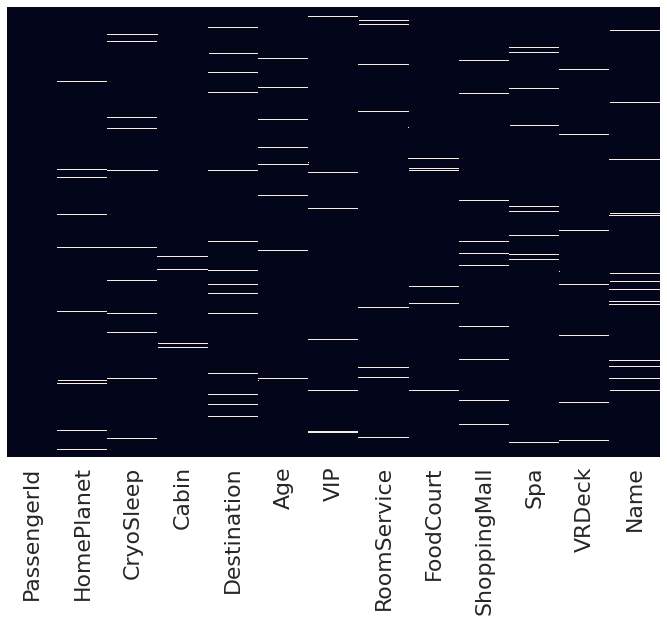

In [ ]:
sns.heatmap(Test.isnull(), yticklabels=False, cbar=False)

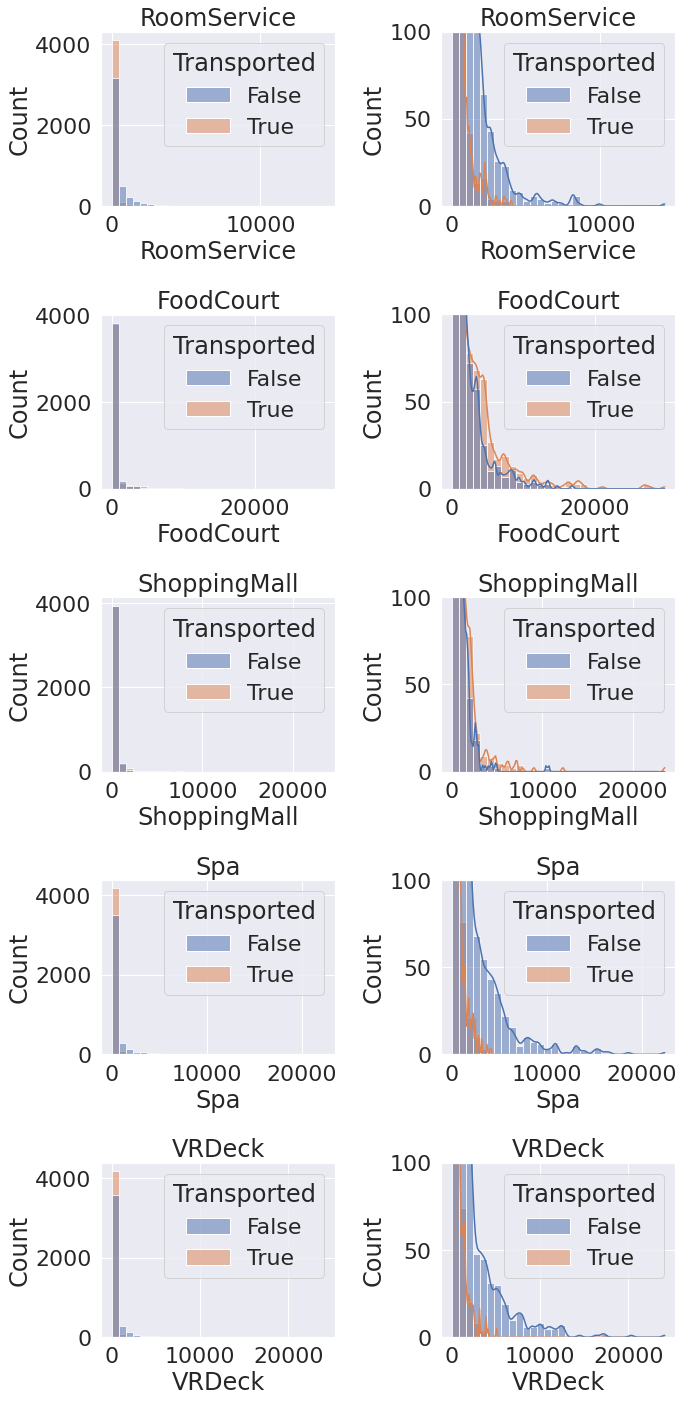

In [ ]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [ ]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df.shape

(8693, 14)

In [ ]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())
Test['Cabin']=Test['Cabin'].fillna(Test['Cabin'].mode())

In [ ]:
df.head(23)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df.shape

(8693, 14)

In [ ]:
def clean(df):
  cols=['HomePlanet', 'CryoSleep', 'VIP', 'Destination']
  for col in cols:
    df[col]=df[col].fillna(df[col].mode()[0])
  return df    

df=clean(df)
Test=clean(Test)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])
df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']] = imputer.transform(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])
Test[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']] = imputer.transform(Test[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [ ]:
df.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.000000,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.000000,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.000000,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.000000,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.000000,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,458.077203,0.0,0.0,17.0,Arlen Mclainez,True
96,0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.000000,0.0,0.0,0.0,Shaele Mclainez,True
97,0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.000000,0.0,0.0,0.0,Fanne Mclainez,False
98,0105_01,Earth,False,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.000000,570.0,2.0,131.0,Carry Cleachrand,False


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["CryoSleep", "HomePlanet", "Destination", "VIP"]

for col in cols:
  df[col]=le.fit_transform(df[col])
  Test[col]=le.transform(Test[col])
  print(le.classes_)


[False  True]
['Earth' 'Europa' 'Mars']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
[False  True]


In [ ]:
#df.drop(['PassengerId'], axis=1, inplace=True)
def clean(df):
    df = df.drop(["PassengerId" ,"Cabin", "Name"], axis=1)
    return df

df=clean(df)
Test=clean(Test)

In [ ]:
df.info()
print (' ')
df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 747.2+ KB
 


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.000000,0.0,0.000000,False
1,0,0,2,24.0,0,109.0,9.0,25.000000,549.0,44.000000,True
2,1,0,2,58.0,1,43.0,3576.0,0.000000,6715.0,49.000000,False
3,1,0,2,33.0,0,0.0,1283.0,371.000000,3329.0,193.000000,False
4,0,0,2,16.0,0,303.0,70.0,151.000000,565.0,2.000000,True
5,0,0,1,44.0,0,0.0,483.0,0.000000,291.0,0.000000,True
6,0,0,2,26.0,0,42.0,1539.0,3.000000,0.0,0.000000,True
7,0,1,2,28.0,0,0.0,0.0,0.000000,0.0,304.854791,True
8,0,0,2,35.0,0,0.0,785.0,17.000000,216.0,0.000000,True
9,1,1,0,14.0,0,0.0,0.0,0.000000,0.0,0.000000,True


In [ ]:
print(df.isnull().sum())
print (' ')
Test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
 


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

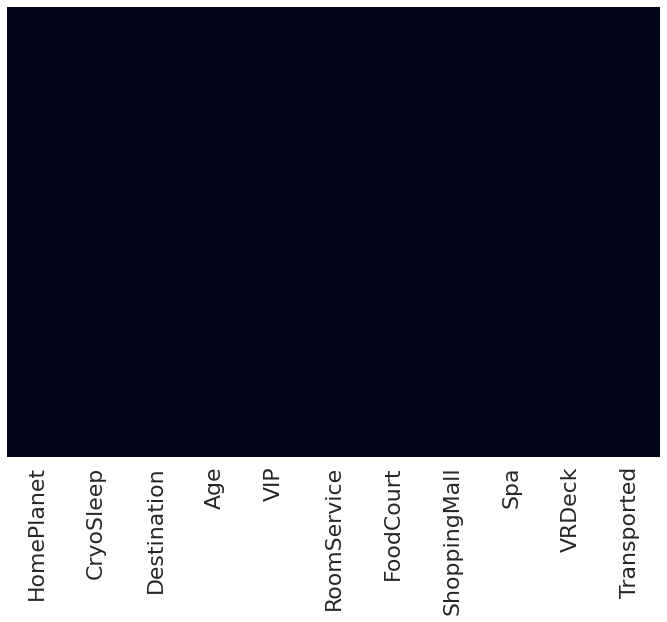

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
## Check for unique labels in each column
for col in df.columns:
    print(len(df[col].value_counts()))

3
2
3
81
2
1274
1508
1116
1328
1307
2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 747.2+ KB


In [ ]:
df.head(25)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.000000,0.0,0.000000,False
1,0,0,2,24.0,0,109.0,9.0,25.000000,549.0,44.000000,True
2,1,0,2,58.0,1,43.0,3576.0,0.000000,6715.0,49.000000,False
3,1,0,2,33.0,0,0.0,1283.0,371.000000,3329.0,193.000000,False
4,0,0,2,16.0,0,303.0,70.0,151.000000,565.0,2.000000,True
5,0,0,1,44.0,0,0.0,483.0,0.000000,291.0,0.000000,True
6,0,0,2,26.0,0,42.0,1539.0,3.000000,0.0,0.000000,True
7,0,1,2,28.0,0,0.0,0.0,0.000000,0.0,304.854791,True
8,0,0,2,35.0,0,0.0,785.0,17.000000,216.0,0.000000,True
9,1,1,0,14.0,0,0.0,0.0,0.000000,0.0,0.000000,True


In [ ]:
#from sklearn.linear_model import LogisticRegression

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
#y_test=Test.iloc[:,-1].values

In [ ]:
df.info()
print (' ')
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 747.2+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null

In [ ]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Test=sc.transform(Test.values)

In [ ]:
def acc(classifier,x_test):

    y_pred = classifier.predict(x_test)
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier, X_test)


[[336 102]
 [ 97 335]]
0.771264367816092


In [ ]:
y_pred = classifier.predict(Test)
prediction=np.array(y_pred)

In [ ]:
prediction

array(['True', 'False', 'True', ..., 'True', 'False', 'True'],
      dtype=object)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_id.values,
        "Transported": prediction
    })
submission["Transported"]= submission["Transported"].str.title()
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [ ]:
submission.to_csv("Submission.csv", index=False)